In [491]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [492]:
df = pd.read_csv("./data/laptop_price.csv", encoding='latin-1')
pd.set_option("display.max_column", 50)
pd.set_option("display.max_row", 6)
df
# The default utf-8 was not able to encode the data for some reasons. That's why I specified an encoding format of `latin-14`

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00


In [493]:
df = df.drop(['Product'], axis=1)

In [494]:
df = df.join(pd.get_dummies(df["Company"]).astype("int"))
df = df.drop(['Company'], axis=1)

In [495]:
df = df.join(pd.get_dummies(df["TypeName"]).astype("int"))
df = df.drop(['TypeName'], axis=1)

In [496]:
Screen_Width_Height = df["ScreenResolution"].apply(lambda X: X.split(" ")[-1])
df["Screen_Width"] = Screen_Width_Height.apply(lambda X: X.split("x")[0]).astype("int")
df["Screen_Height"] = Screen_Width_Height.apply(lambda X: X.split("x")[1]).astype("int")
df = df.drop(["ScreenResolution"], axis=1)

In [497]:
df["CPU_Brand"] = df["Cpu"].apply(lambda X: X.split(" ")[0])
df["CPU_Freq"] = df["Cpu"].apply(lambda X: X.split(" ")[-1][:-3]).astype("float")
CPU_df = pd.get_dummies(df["CPU_Brand"])
CPU_df.columns = [col + "_CPU" for col in CPU_df.columns]
df = df.join(CPU_df)
df = df.drop(["Cpu" ,"CPU_Brand"], axis=1)

In [498]:
df

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen_Width,Screen_Height,CPU_Freq,AMD_CPU,Intel_CPU,Samsung_CPU
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2560,1600,2.3,0,1,0
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1440,900,1.8,0,1,0
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1920,1080,2.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1318,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,1.6,0,1,0
1301,1319,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,2.5,0,1,0
1302,1320,15.6,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,1.6,0,1,0


In [499]:
def to_mb(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [500]:
df["RAM(mb)"] = df["Ram"].apply(to_mb)
df = df.drop(["Ram"], axis=1)

In [501]:
df["Memory_size"] = df["Memory"].apply(lambda X: X.split(" ")[0][:-2]).astype("float")
df["Storage_type"] = df["Memory"].apply(lambda X: X.split(" ")[1])
df = df.join(pd.get_dummies(df["Storage_type"]))
df = df.drop(["Memory"], axis=1)
df = df.drop(["Storage_type"], axis=1)
df

,laptop_ID,Inches,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen_Width,Screen_Height,CPU_Freq,AMD_CPU,Intel_CPU,Samsung_CPU,RAM(mb),Memory_size,Flash,HDD,Hybrid,SSD
0,1,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2560,1600,2.3,0,1,0,8000.0,128.0,0,0,0,1
1,2,13.3,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1440,900,1.8,0,1,0,8000.0,128.0,1,0,0,0
2,3,15.6,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1920,1080,2.5,0,1,0,8000.0,256.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1318,14.0,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,1.6,0,1,0,2000.0,64.0,1,0,0,0
1301,1319,15.6,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,2.5,0,1,0,6000.0,1.0,0,1,0,0
1302,1320,15.6,Intel HD Graphics,Windows 10,2.2kg,369.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,1.6,0,1,0,4000.0,500.0,0,1,0,0


In [502]:
df["GPU_Brand"] = df["Gpu"].apply(lambda X: X.split(" ")[0])
GPU_Brands_df = pd.get_dummies(df["GPU_Brand"])
GPU_Brands_df.columns = [col + "_GPU" for col in GPU_Brands_df.columns]
df = df.join(GPU_Brands_df)
df = df.drop(["Gpu", "GPU_Brand"], axis=1)
df

,laptop_ID,Inches,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen_Width,Screen_Height,CPU_Freq,AMD_CPU,Intel_CPU,Samsung_CPU,RAM(mb),Memory_size,Flash,HDD,Hybrid,SSD,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,macOS,1.37kg,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2560,1600,2.3,0,1,0,8000.0,128.0,0,0,0,1,0,0,1,0
1,2,13.3,macOS,1.34kg,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1440,900,1.8,0,1,0,8000.0,128.0,1,0,0,0,0,0,1,0
2,3,15.6,No OS,1.86kg,575.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1920,1080,2.5,0,1,0,8000.0,256.0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1318,14.0,Windows 10,1.5kg,229.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,1.6,0,1,0,2000.0,64.0,1,0,0,0,0,0,1,0
1301,1319,15.6,Windows 10,2.19kg,764.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,2.5,0,1,0,6000.0,1.0,0,1,0,0,1,0,0,0
1302,1320,15.6,Windows 10,2.2kg,369.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,1.6,0,1,0,4000.0,500.0,0,1,0,0,0,0,1,0


In [503]:
op_sys = pd.get_dummies(df["OpSys"])
df = df.join(op_sys)
df = df.drop(["OpSys"], axis=1)
df

,laptop_ID,Inches,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,...,Screen_Width,Screen_Height,CPU_Freq,AMD_CPU,Intel_CPU,Samsung_CPU,RAM(mb),Memory_size,Flash,HDD,Hybrid,SSD,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,1.37kg,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2560,1600,2.3,0,1,0,8000.0,128.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,13.3,1.34kg,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1440,900,1.8,0,1,0,8000.0,128.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,3,15.6,1.86kg,575.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1920,1080,2.5,0,1,0,8000.0,256.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1318,14.0,1.5kg,229.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1366,768,1.6,0,1,0,2000.0,64.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1301,1319,15.6,2.19kg,764.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1366,768,2.5,0,1,0,6000.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1302,1320,15.6,2.2kg,369.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1366,768,1.6,0,1,0,4000.0,500.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [504]:
df["Weight"] = df["Weight"].apply(lambda X: X[:-2]).astype("float")
df

,laptop_ID,Inches,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,...,Screen_Width,Screen_Height,CPU_Freq,AMD_CPU,Intel_CPU,Samsung_CPU,RAM(mb),Memory_size,Flash,HDD,Hybrid,SSD,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,1.37,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2560,1600,2.3,0,1,0,8000.0,128.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,13.3,1.34,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1440,900,1.8,0,1,0,8000.0,128.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,3,15.6,1.86,575.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1920,1080,2.5,0,1,0,8000.0,256.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1318,14.0,1.50,229.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1366,768,1.6,0,1,0,2000.0,64.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1301,1319,15.6,2.19,764.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1366,768,2.5,0,1,0,6000.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1302,1320,15.6,2.20,369.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1366,768,1.6,0,1,0,4000.0,500.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [505]:
# plt.figure(figsize=(10, 5))
pd.set_option("display.max_row", 10)
target_columns = df.corr()["Price_euros"].apply(abs).sort_values()

In [506]:
selected_features = target_columns[-21:].index
list(selected_features)

['AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Flash',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Memory_size',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'CPU_Freq',
 'SSD',
 'Notebook',
 'Screen_Height',
 'Screen_Width',
 'RAM(mb)',
 'Price_euros']

In [507]:
# The new_df below contains only our selected features [features with reasonable correlation to our label `Price_euros` ==> y]
new_df = df[selected_features]
new_df

,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Flash,Razer,Workstation,Ultrabook,Memory_size,Nvidia_GPU,Gaming,HDD,CPU_Freq,SSD,Notebook,Screen_Height,Screen_Width,RAM(mb),Price_euros
0,0,1,1,0,0,1.37,0,0,0,1,128.0,0,0,0,2.3,1,0,1600,2560,8000.0,1339.69
1,0,1,1,0,0,1.34,1,0,0,1,128.0,0,0,0,1.8,0,0,900,1440,8000.0,898.94
2,0,1,1,0,0,1.86,0,0,0,0,256.0,0,0,0,2.5,1,1,1080,1920,8000.0,575.00
3,0,1,0,1,0,1.83,0,0,0,1,512.0,0,0,0,2.7,1,0,1800,2880,16000.0,2537.45
4,0,1,1,0,0,1.37,0,0,0,1,256.0,0,0,0,3.1,1,0,1600,2560,8000.0,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,1,1,0,0,1.80,0,0,0,0,128.0,0,0,0,2.5,1,0,1080,1920,4000.0,638.00
1299,0,1,1,0,0,1.30,0,0,0,0,512.0,0,0,0,2.5,1,0,1800,3200,16000.0,1499.00
1300,0,1,1,0,0,1.50,1,0,0,0,64.0,0,0,0,1.6,0,1,768,1366,2000.0,229.00
1301,0,1,0,1,0,2.19,0,0,0,0,1.0,0,0,1,2.5,0,1,768,1366,6000.0,764.00


<Axes: >

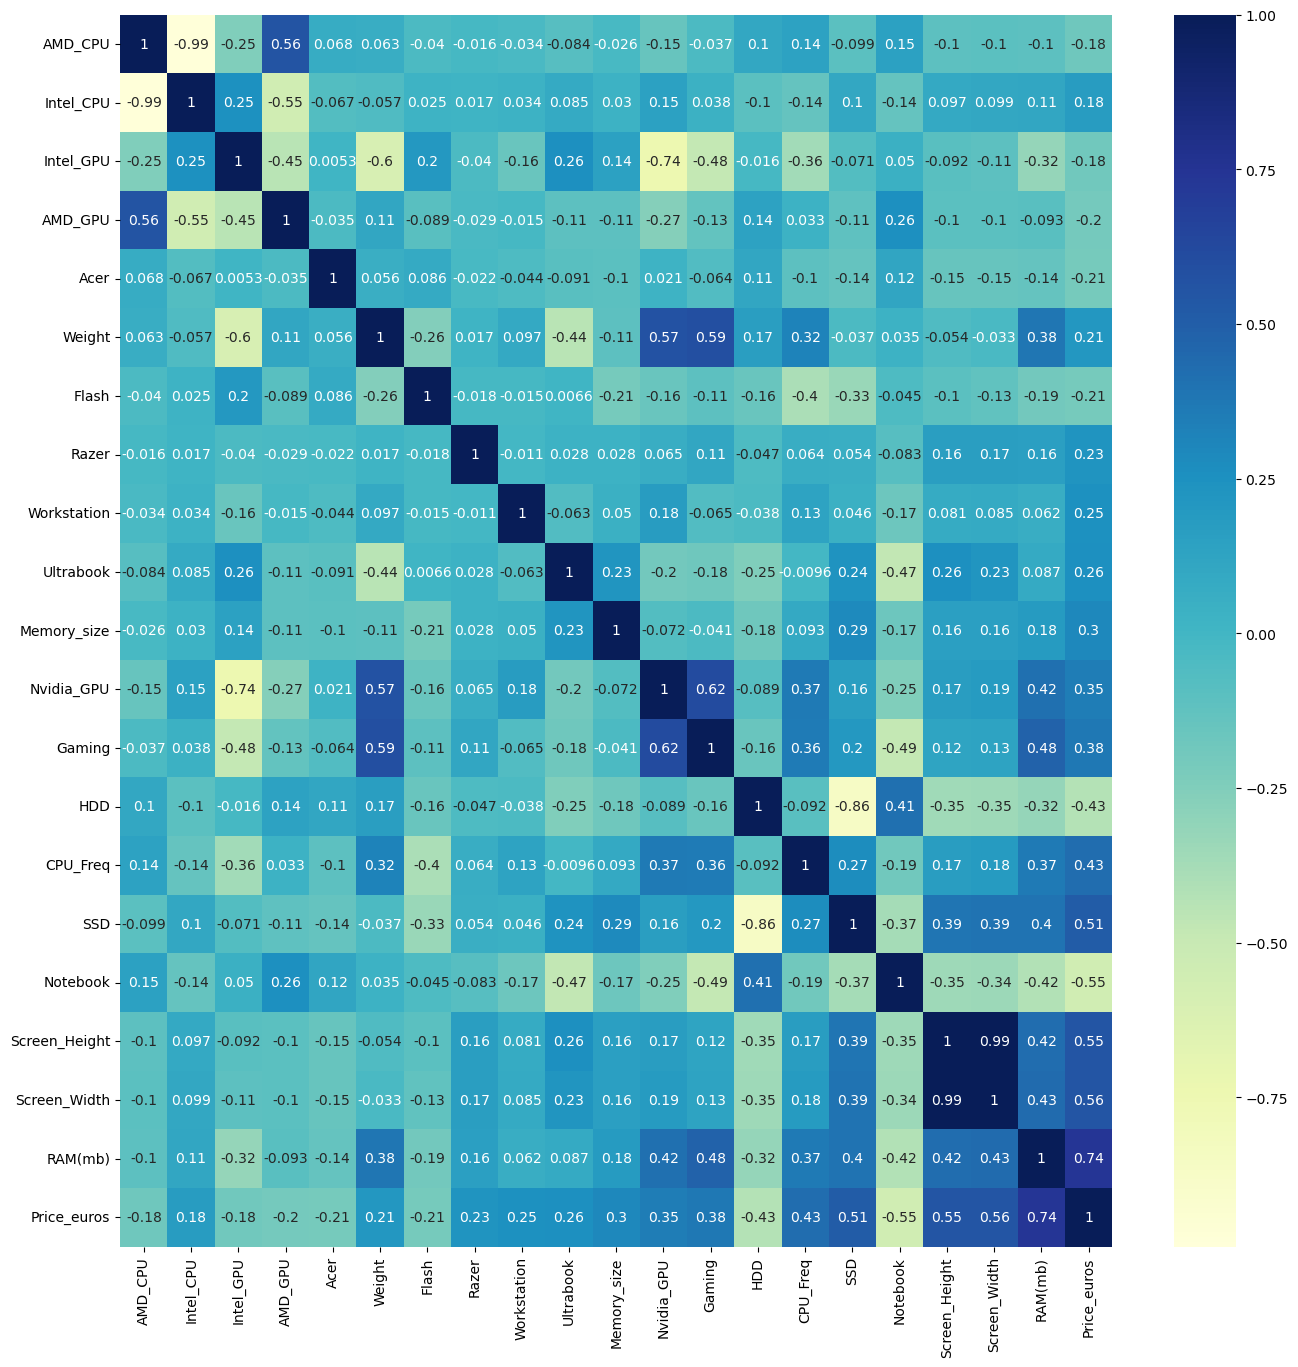

In [508]:
plt.figure(figsize=(16,16))
sns.heatmap(new_df.corr(), annot=True, cmap="YlGnBu")

In [509]:
X, y = new_df.drop(["Price_euros"], axis=1), new_df["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [510]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [511]:
Score = forest.score(X_test, y_test) * 100
Result = "This model is " + str(round(Score, 2)) + "% accurrate"
print(Result)

This model is 83.96% accurrate


- ##### Quick Note:
Sometimes, part of your data appears to be numbers but they are actually strings. Before you train your model, first use df.hist() - This will plot the histogram of all numerical columns.
You can also use df.info() to check the datatype of each column